# 株価予測

- [超簡単Pythonで株価予測（LightGBM 利用）機械学習](https://note.com/10mohi6/n/n4b1196fea816)
- [超簡単Pythonで株価予測（Optuna・LightGBM 利用）ハイパーパラメータ自動最適化](https://note.com/10mohi6/n/n46d1bb0267b7)

In [1]:
!pip install scikit-learn lightgbm pandas-datareader optuna mplfinance

In [2]:
!pip install graphviz japanize-matplotlib

In [3]:
# pandasのインポート
import pandas as pd

In [4]:
# データの読み込み
df = pd.read_csv('6701_wFeatures.csv')
# データフレームの表示
df

,Date,weeks,weekday,High,Low,Open,Close,Volume,delta_Close,Up,...,lower1,upper2,lower2,upper3,lower3,macd,macdsignal,macdhist,rsi9,rsi14
0,2010-01-04,2348,0,2440.0,2380.0,2380.0,2420.0,1386200.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,2348,1,2470.0,2420.0,2450.0,2430.0,2641400.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,2348,2,2430.0,2430.0,2430.0,2430.0,2662100.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07,2348,3,2450.0,2420.0,2430.0,2440.0,1938600.0,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08,2348,4,2500.0,2440.0,2470.0,2450.0,3499400.0,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,2021-12-24,2972,4,5300.0,5240.0,5300.0,5260.0,520900.0,-10.0,0.0,...,5160.785966,5434.428068,5069.571932,5525.642102,4978.357898,-65.117661,-86.345627,21.227967,47.490766,44.765348
2952,2021-12-27,2973,0,5290.0,5180.0,5280.0,5200.0,527600.0,-60.0,1.0,...,5157.221837,5431.956327,5065.643673,5523.534490,4974.065510,-65.580715,-82.192645,16.611930,41.800209,41.416128
2953,2021-12-28,2973,1,5240.0,5190.0,5200.0,5240.0,805700.0,40.0,1.0,...,5156.110984,5430.578031,5064.621969,5522.067047,4973.132953,-62.005265,-78.155169,16.149904,46.599247,44.402543
2954,2021-12-29,2973,2,5310.0,5250.0,5250.0,5310.0,727100.0,70.0,0.0,...,5160.910984,5435.378031,5069.421969,5526.867047,4977.932953,-52.913328,-73.106801,20.193473,54.057513,49.275704


In [5]:
# 各カラムの詳細確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2956 non-null   object 
 1   weeks        2956 non-null   int64  
 2   weekday      2956 non-null   int64  
 3   High         2956 non-null   float64
 4   Low          2956 non-null   float64
 5   Open         2956 non-null   float64
 6   Close        2956 non-null   float64
 7   Volume       2956 non-null   float64
 8   delta_Close  2955 non-null   float64
 9   Up           2956 non-null   float64
 10  Close_ratio  2955 non-null   float64
 11  Body         2956 non-null   float64
 12  Force_Index  2956 non-null   float64
 13  sma3         2954 non-null   float64
 14  sma5         2952 non-null   float64
 15  sma25        2932 non-null   float64
 16  sma50        2907 non-null   float64
 17  sma75        2882 non-null   float64
 18  sma100       2857 non-null   float64
 19  upper1

In [6]:
# Dateのデータ型を'datetime'型へ変更
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2956 non-null   datetime64[ns]
 1   weeks        2956 non-null   int64         
 2   weekday      2956 non-null   int64         
 3   High         2956 non-null   float64       
 4   Low          2956 non-null   float64       
 5   Open         2956 non-null   float64       
 6   Close        2956 non-null   float64       
 7   Volume       2956 non-null   float64       
 8   delta_Close  2955 non-null   float64       
 9   Up           2956 non-null   float64       
 10  Close_ratio  2955 non-null   float64       
 11  Body         2956 non-null   float64       
 12  Force_Index  2956 non-null   float64       
 13  sma3         2954 non-null   float64       
 14  sma5         2952 non-null   float64       
 15  sma25        2932 non-null   float64       
 16  sma50 

In [7]:
# 日付をインデックスにセット
df.set_index(keys='Date', inplace=True)
df

,weeks,weekday,High,Low,Open,Close,Volume,delta_Close,Up,Close_ratio,...,lower1,upper2,lower2,upper3,lower3,macd,macdsignal,macdhist,rsi9,rsi14
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,2348,0,2440.0,2380.0,2380.0,2420.0,1386200.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,2348,1,2470.0,2420.0,2450.0,2430.0,2641400.0,10.0,0.0,0.004132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,2348,2,2430.0,2430.0,2430.0,2430.0,2662100.0,0.0,1.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,2348,3,2450.0,2420.0,2430.0,2440.0,1938600.0,10.0,1.0,0.004115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,2348,4,2500.0,2440.0,2470.0,2450.0,3499400.0,10.0,1.0,0.004098,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,2972,4,5300.0,5240.0,5300.0,5260.0,520900.0,-10.0,0.0,-0.001898,...,5160.785966,5434.428068,5069.571932,5525.642102,4978.357898,-65.117661,-86.345627,21.227967,47.490766,44.765348
2021-12-27,2973,0,5290.0,5180.0,5280.0,5200.0,527600.0,-60.0,1.0,-0.011407,...,5157.221837,5431.956327,5065.643673,5523.534490,4974.065510,-65.580715,-82.192645,16.611930,41.800209,41.416128
2021-12-28,2973,1,5240.0,5190.0,5200.0,5240.0,805700.0,40.0,1.0,0.007692,...,5156.110984,5430.578031,5064.621969,5522.067047,4973.132953,-62.005265,-78.155169,16.149904,46.599247,44.402543


# 不要なデータを削除する

In [8]:
# 不要カラムの削除と並べ替え
df = df[['weekday',
         #'High', 'Low', 'Open', 'Close',
         'Close_ratio', 'Body', 'Force_Index',
         'sma3', 'sma5', 'sma25', 'sma50', 'sma75', 'sma100',
         'upper1', 'lower1', 'upper2', 'lower2', 'upper3', 'lower3',
         'macd', 'macdsignal', 'macdhist',
         'rsi9','rsi14',
         'Up']]
df.dropna()
df

,weekday,Close_ratio,Body,Force_Index,sma3,sma5,sma25,sma50,sma75,sma100,...,upper2,lower2,upper3,lower3,macd,macdsignal,macdhist,rsi9,rsi14,Up
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0,NaN,-40.0,3.354604e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2010-01-05,1,0.004132,20.0,6.418602e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2010-01-06,2,0.000000,0.0,6.468903e+09,2426.666667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2010-01-07,3,0.004115,-10.0,4.730184e+09,2433.333333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2010-01-08,4,0.004098,20.0,8.573530e+09,2440.000000,2434.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,4,-0.001898,40.0,2.739934e+09,5280.000000,5264.0,5252.0,5558.0,5737.333333,5729.0,...,5434.428068,5069.571932,5525.642102,4978.357898,-65.117661,-86.345627,21.227967,47.490766,44.765348,0.0
2021-12-27,0,-0.011407,80.0,2.743520e+09,5243.333333,5274.0,5248.8,5541.0,5725.600000,5723.4,...,5431.956327,5065.643673,5523.534490,4974.065510,-65.580715,-82.192645,16.611930,41.800209,41.416128,1.0
2021-12-28,1,0.007692,-40.0,4.221868e+09,5233.333333,5256.0,5247.6,5520.4,5714.933333,5718.3,...,5430.578031,5064.621969,5522.067047,4973.132953,-62.005265,-78.155169,16.149904,46.599247,44.402543,1.0


# 学習データと検証データに分割する

In [9]:
# 学習データを2018-01-01～2020-12-31の期間とし、df_trainに入力する
df_train = df['2018-01-01':'2020-12-31']
df_train

,weekday,Close_ratio,Body,Force_Index,sma3,sma5,sma25,sma50,sma75,sma100,...,upper2,lower2,upper3,lower3,macd,macdsignal,macdhist,rsi9,rsi14,Up
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0,0.000000,0.0,0.000000e+00,3036.666667,3036.0,3036.72,3021.88,3029.346667,3003.31,...,3140.751564,2932.688436,3192.767347,2880.672653,10.616501,16.874756,-6.258256,47.776975,50.706687,0.0
2018-01-02,1,0.000000,0.0,0.000000e+00,3040.000000,3038.0,3041.36,3019.18,3030.013333,3003.81,...,3134.661884,2948.058116,3181.312826,2901.407174,9.167173,15.333240,-6.166066,47.776975,50.706687,0.0
2018-01-03,2,0.000000,0.0,0.000000e+00,3040.000000,3038.0,3043.52,3017.28,3030.813333,3004.31,...,3134.054625,2952.985375,3179.321938,2907.718062,7.927191,13.852030,-5.924839,47.776975,50.706687,1.0
2018-01-04,3,0.018092,15.0,3.060955e+09,3058.333333,3051.0,3047.32,3016.48,3032.613333,3005.56,...,3138.203169,2956.436831,3183.644753,2910.995247,11.252821,13.332188,-2.079367,67.422077,62.058423,1.0
2018-01-05,4,0.004847,0.0,3.111866e+09,3081.666667,3065.0,3052.16,3016.08,3034.480000,3007.06,...,3142.992030,2961.327970,3188.408044,2915.911956,14.926715,13.651094,1.275622,70.793080,64.462116,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,3,-0.001821,10.0,3.898472e+09,5470.000000,5512.0,5538.80,5579.40,5664.266667,5638.50,...,5718.249826,5359.350174,5807.974739,5269.625261,-25.921052,-28.671305,2.750254,46.710375,46.953341,0.0
2020-12-25,4,-0.005474,40.0,1.920035e+09,5473.333333,5484.0,5534.80,5569.20,5664.933333,5633.90,...,5717.501505,5352.098495,5808.852258,5260.747742,-28.711723,-28.679389,-0.032334,44.359986,45.495144,0.0
2020-12-28,0,-0.003670,20.0,3.859101e+09,5453.333333,5458.0,5532.80,5559.00,5667.066667,5629.30,...,5718.919961,5346.680039,5811.979942,5253.620058,-32.166388,-29.376789,-2.789600,42.746775,44.502871,1.0


In [10]:
# 検証データを2021-01-01以降とし、df_valに入力する
df_val = df['2021-01-01':]
df_val

,weekday,Close_ratio,Body,Force_Index,sma3,sma5,sma25,sma50,sma75,sma100,...,upper2,lower2,upper3,lower3,macd,macdsignal,macdhist,rsi9,rsi14,Up
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,0,0.001805,80.0,5.704290e+09,5550.000000,5506.0,5528.8,5543.8,5669.866667,5629.6,...,5710.817142,5346.782858,5801.825713,5255.774287,-14.254041,-24.047535,9.793495,53.764562,51.303153,1.0
2021-01-05,1,0.012613,-90.0,5.011916e+09,5570.000000,5540.0,5527.2,5543.4,5669.333333,5630.4,...,5705.235502,5349.164498,5794.253253,5260.146747,-4.659982,-20.170025,15.510042,59.878845,55.166379,0.0
2021-01-06,2,-0.012456,10.0,6.056715e+09,5573.333333,5564.0,5524.0,5541.6,5668.933333,5632.1,...,5697.343589,5350.656411,5784.015384,5263.984616,-2.674211,-16.670862,13.996651,52.124191,50.824229,1.0
2021-01-07,3,0.003604,-10.0,7.908286e+09,5580.000000,5566.0,5520.4,5540.8,5668.533333,5633.9,...,5685.855009,5354.944991,5768.582513,5272.217487,0.507510,-13.235187,13.742698,54.037466,51.987031,1.0
2021-01-08,4,0.023339,-120.0,1.013973e+10,5606.666667,5598.0,5521.6,5540.6,5668.266667,5637.3,...,5691.746290,5351.453710,5776.819435,5266.380565,13.364899,-7.915170,21.280069,64.431660,58.805563,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,4,-0.001898,40.0,2.739934e+09,5280.000000,5264.0,5252.0,5558.0,5737.333333,5729.0,...,5434.428068,5069.571932,5525.642102,4978.357898,-65.117661,-86.345627,21.227967,47.490766,44.765348,0.0
2021-12-27,0,-0.011407,80.0,2.743520e+09,5243.333333,5274.0,5248.8,5541.0,5725.600000,5723.4,...,5431.956327,5065.643673,5523.534490,4974.065510,-65.580715,-82.192645,16.611930,41.800209,41.416128,1.0
2021-12-28,1,0.007692,-40.0,4.221868e+09,5233.333333,5256.0,5247.6,5520.4,5714.933333,5718.3,...,5430.578031,5064.621969,5522.067047,4973.132953,-62.005265,-78.155169,16.149904,46.599247,44.402543,1.0


In [11]:
# 学習データを説明変数（X_train）と目的変数（y_train）に分ける
X_train = df_train[['weekday',
         #'High', 'Low', 'Open', 'Close',
         'Close_ratio', 'Body', 'Force_Index',
         'sma3', 'sma5', 'sma25', 'sma50', 'sma75', 'sma100',
         'upper1', 'lower1', 'upper2', 'lower2', 'upper3', 'lower3',
         'macd', 'macdsignal', 'macdhist',
         'rsi9','rsi14']]
y_train = df_train[['Up']]

# 学習データの説明変数と目的変数を確認
print(X_train)
print(y_train)

            weekday  Close_ratio   Body   Force_Index         sma3    sma5  \
Date                                                                         
2018-01-01        0     0.000000    0.0  0.000000e+00  3036.666667  3036.0   
2018-01-02        1     0.000000    0.0  0.000000e+00  3040.000000  3038.0   
2018-01-03        2     0.000000    0.0  0.000000e+00  3040.000000  3038.0   
2018-01-04        3     0.018092   15.0  3.060955e+09  3058.333333  3051.0   
2018-01-05        4     0.004847    0.0  3.111866e+09  3081.666667  3065.0   
...             ...          ...    ...           ...          ...     ...   
2020-12-24        3    -0.001821   10.0  3.898472e+09  5470.000000  5512.0   
2020-12-25        4    -0.005474   40.0  1.920035e+09  5473.333333  5484.0   
2020-12-28        0    -0.003670   20.0  3.859101e+09  5453.333333  5458.0   
2020-12-29        1     0.023941 -110.0  5.539984e+09  5480.000000  5482.0   
2020-12-30        2    -0.003597   20.0  4.150014e+09  5510.0000

In [12]:
# 検証データを説明変数（X_valid）と目的変数（y_valid）に分ける
X_valid = df_val[['weekday',
         #'High', 'Low', 'Open', 'Close',
         'Close_ratio', 'Body', 'Force_Index',
         'sma3', 'sma5', 'sma25', 'sma50', 'sma75', 'sma100',
         'upper1', 'lower1', 'upper2', 'lower2', 'upper3', 'lower3',
         'macd', 'macdsignal', 'macdhist',
         'rsi9','rsi14']]
y_valid = df_val[['Up']]

# 検証データの説明変数と目的変数を確認
print(X_valid)
print(y_valid)

            weekday  Close_ratio   Body   Force_Index         sma3    sma5  \
Date                                                                         
2021-01-04        0     0.001805   80.0  5.704290e+09  5550.000000  5506.0   
2021-01-05        1     0.012613  -90.0  5.011916e+09  5570.000000  5540.0   
2021-01-06        2    -0.012456   10.0  6.056715e+09  5573.333333  5564.0   
2021-01-07        3     0.003604  -10.0  7.908286e+09  5580.000000  5566.0   
2021-01-08        4     0.023339 -120.0  1.013973e+10  5606.666667  5598.0   
...             ...          ...    ...           ...          ...     ...   
2021-12-24        4    -0.001898   40.0  2.739934e+09  5280.000000  5264.0   
2021-12-27        0    -0.011407   80.0  2.743520e+09  5243.333333  5274.0   
2021-12-28        1     0.007692  -40.0  4.221868e+09  5233.333333  5256.0   
2021-12-29        2     0.013359  -60.0  3.860901e+09  5250.000000  5256.0   
2021-12-30        3     0.000000  -30.0  4.850685e+09  5286.6666

In [13]:
# matplotlibのインポート
from matplotlib import pyplot as plt
%matplotlib inline

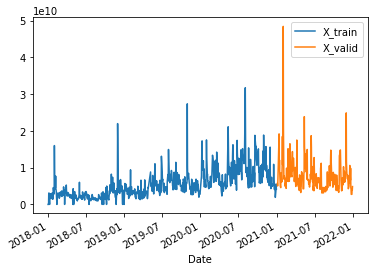

In [14]:
# 学習データと検証データの勢力指数（Force_Index）の折れ線グラフ作成
X_train['Force_Index'].plot(kind='line')
X_valid['Force_Index'].plot(kind='line')

# グラフの凡例を設定
plt.legend(['X_train', 'X_valid'])

# グラフの表示
plt.show()

# 予測モデルを作成する

In [15]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, precision_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import optuna

# ログを非表示にしたいときは、optuna.logging.disable_default_handler()
# 逆に、表示にしたいときは、optuna.logging.enable_default_handler()
optuna.logging.disable_default_handler()

In [16]:
def objective(trial):
    dtrain = lgb.Dataset(X_train, label=y_train)
    param = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(X_valid)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_valid, pred_labels)
    return accuracy

In [17]:
def autotuning(seed=31):
    #tuner = optuna.create_study(direction="maximize")
    # "sampler"オプションで乱数シードを指定
    tuner = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=seed))
    tuner.optimize(objective, n_trials=100)

    clf = lgb.LGBMRegressor(**dict(tuner.best_trial.params.items()))
    clf.fit(
        X_train,
        y_train,
    )

    y_pred = clf.predict(X_valid)
    print('accuracy_score: %s' %accuracy_score(y_valid, y_pred > 0.5))
    print('f1_score      : %s' %f1_score(y_valid, y_pred > 0.5, average='macro'))
    # Tupleとして戻り値に
    return (seed, accuracy_score(y_valid, y_pred > 0.5), f1_score(y_valid, y_pred > 0.5, average='macro'), tuner.best_trial.params.items())

In [18]:
import math

# 乱数を取得するワンライナー
sosu = (lambda n:[x for x in range(2,n)if not 0 in map(lambda z:x%z,range(2, int(math.sqrt(x))))])(200)

In [19]:
# 乱数シード
seeds = sosu[:]

In [20]:
# 各試行での情報を保存
result = []

for seed in seeds:
    print('### seed:%s ###' %seed)
    result.append(autotuning(seed))

### seed:2 ###
[LightGBM] [Warning] lambda_l1 is set=0.2371238034341757, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2371238034341757
[LightGBM] [Warning] feature_fraction is set=0.6977625806500835, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6977625806500835
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.4947617579580787, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4947617579580787
[LightGBM] [Warning] bagging_fraction is set=0.5917107397399616, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5917107397399616
accuracy_score: 0.5836734693877551
f1_score      : 0.5521505376344087
### seed:3 ###
[LightGBM] [Warning] lambda_l1 is set=7.5672960324765e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.5672960324765e-08
[LightGBM] [Warning] feature_fraction is set=0.9388572761408488, colsample_bytree=1.0 wil

In [21]:
result_acc = [x[1] for x in result]
print('max: %s' %max(result_acc))
print('min: %s' %min(result_acc))
print('ave: %s' %(sum(result_acc) / len(result_acc)))

max: 0.6040816326530613
min: 0.5265306122448979
ave: 0.5688506981740064


In [22]:
# accracy_score値で降順にソート
result = sorted(result[:], key=lambda x: x[1], reverse=True)
result[0]

(15,
 0.6040816326530613,
 0.5210697083895931,
 dict_items([('lambda_l1', 1.8322042715004714), ('lambda_l2', 3.65112329162107e-07), ('num_leaves', 133), ('feature_fraction', 0.626413949022768), ('bagging_fraction', 0.5875552972338387), ('bagging_freq', 2), ('min_child_samples', 23)]))

In [23]:
def mybest(tunedparam):
    clf = lgb.LGBMRegressor(**dict(tunedparam))
    clf.fit(
        X_train,
        y_train,
    )

    y_pred = clf.predict(X_valid)
    print('accuracy_score: %s' %accuracy_score(y_valid, y_pred > 0.5))
    print('f1_score      : %s' %f1_score(y_valid, y_pred > 0.5, average='macro'))
    return (clf, y_pred)

In [24]:
# 最もaccracy_score値の高かった試行でのハイパーパラメータを使って改めてモデルを構築
clf, y_pred = mybest(result[0][3])

[LightGBM] [Warning] lambda_l1 is set=1.8322042715004714, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8322042715004714
[LightGBM] [Warning] feature_fraction is set=0.626413949022768, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.626413949022768
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.65112329162107e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.65112329162107e-07
[LightGBM] [Warning] bagging_fraction is set=0.5875552972338387, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5875552972338387
accuracy_score: 0.6040816326530613
f1_score      : 0.5210697083895931


# 予測精度を確認する

AUC 0.5303213661422617


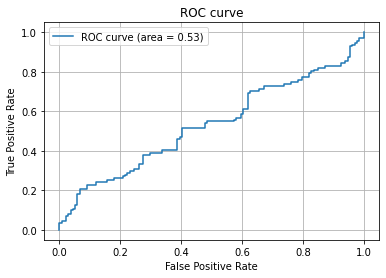

accuracy 0.6040816326530613
precision 0.71875


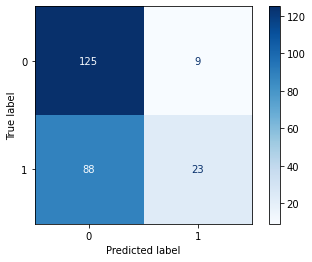

In [25]:
# AUCを計算
fpr, tpr, thresholds = roc_curve(np.asarray(y_valid), y_pred)
auc = auc(fpr, tpr)
print("AUC", auc)

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

# accuracy, precisionを計算
acc = accuracy_score(np.asarray(y_valid), np.round(y_pred))
precision = precision_score(np.asarray(y_valid), np.round(y_pred))
print("accuracy", acc)
print("precision", precision)

# 混同行列をプロット
y_pred = np.round(y_pred)
cm = confusion_matrix(np.asarray(y_valid), np.where(y_pred < 0.5, 0, 1))
cmp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
cmp.plot(cmap=plt.cm.Blues)
plt.show()

# 特徴量重要度を図示する

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

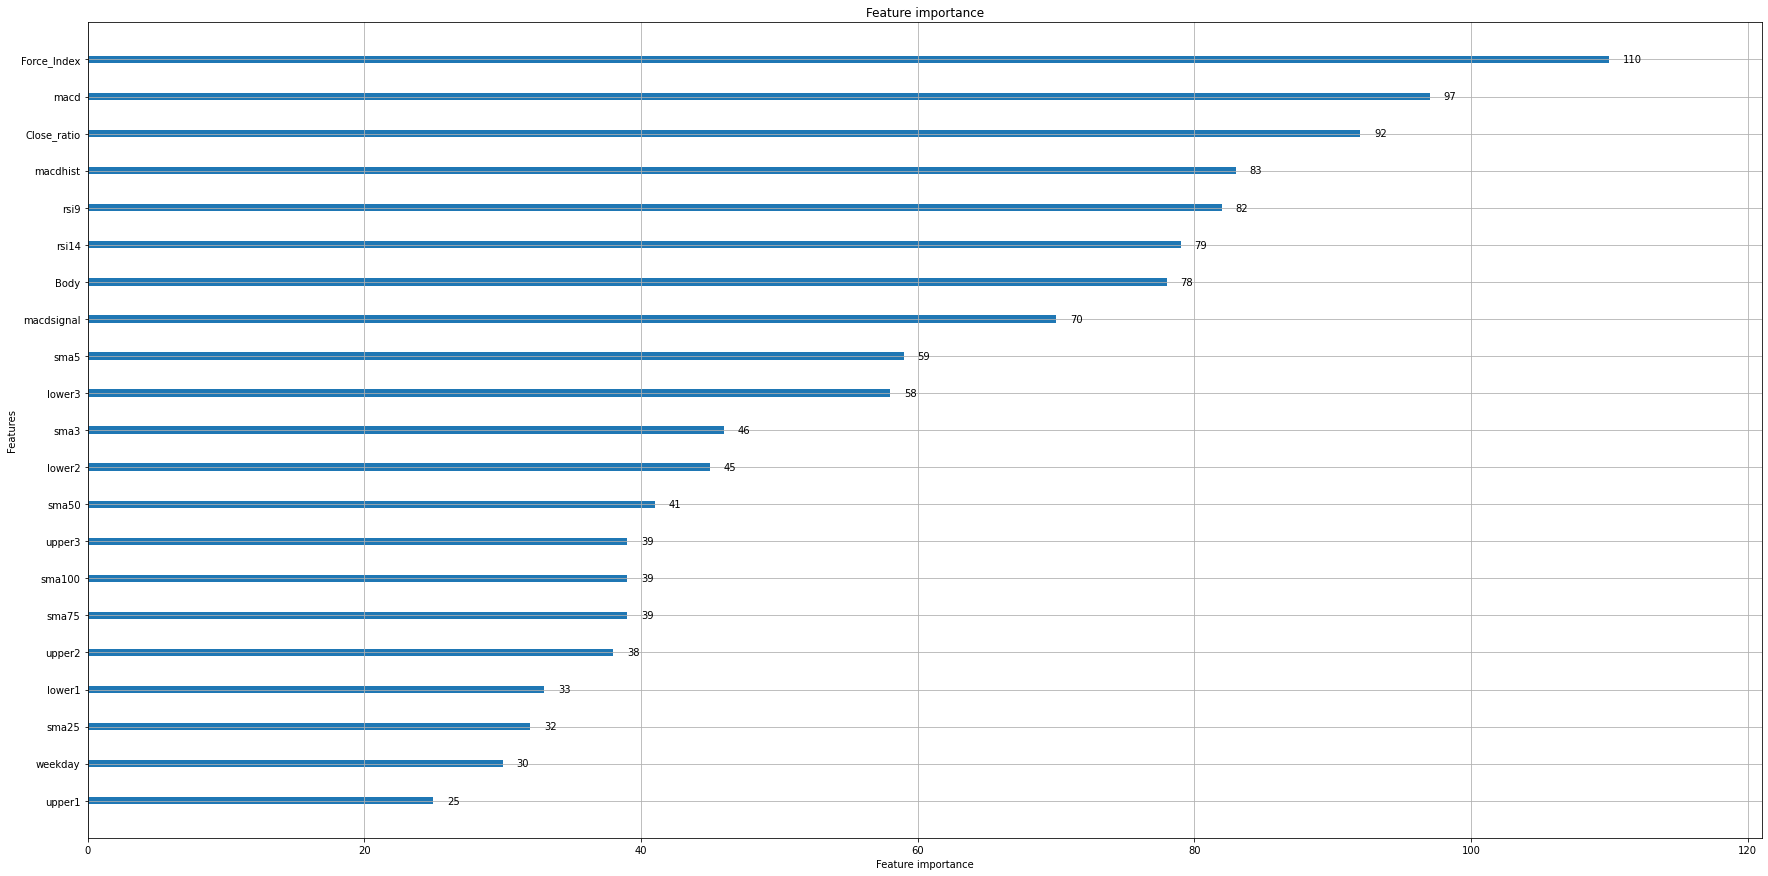

In [26]:
# 重要度としては「特徴量が分岐（ノード）の条件式で使用された回数」（＝デフォルト）
lgb.plot_importance(clf, figsize=(30, 15), max_num_features=30, importance_type='split')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

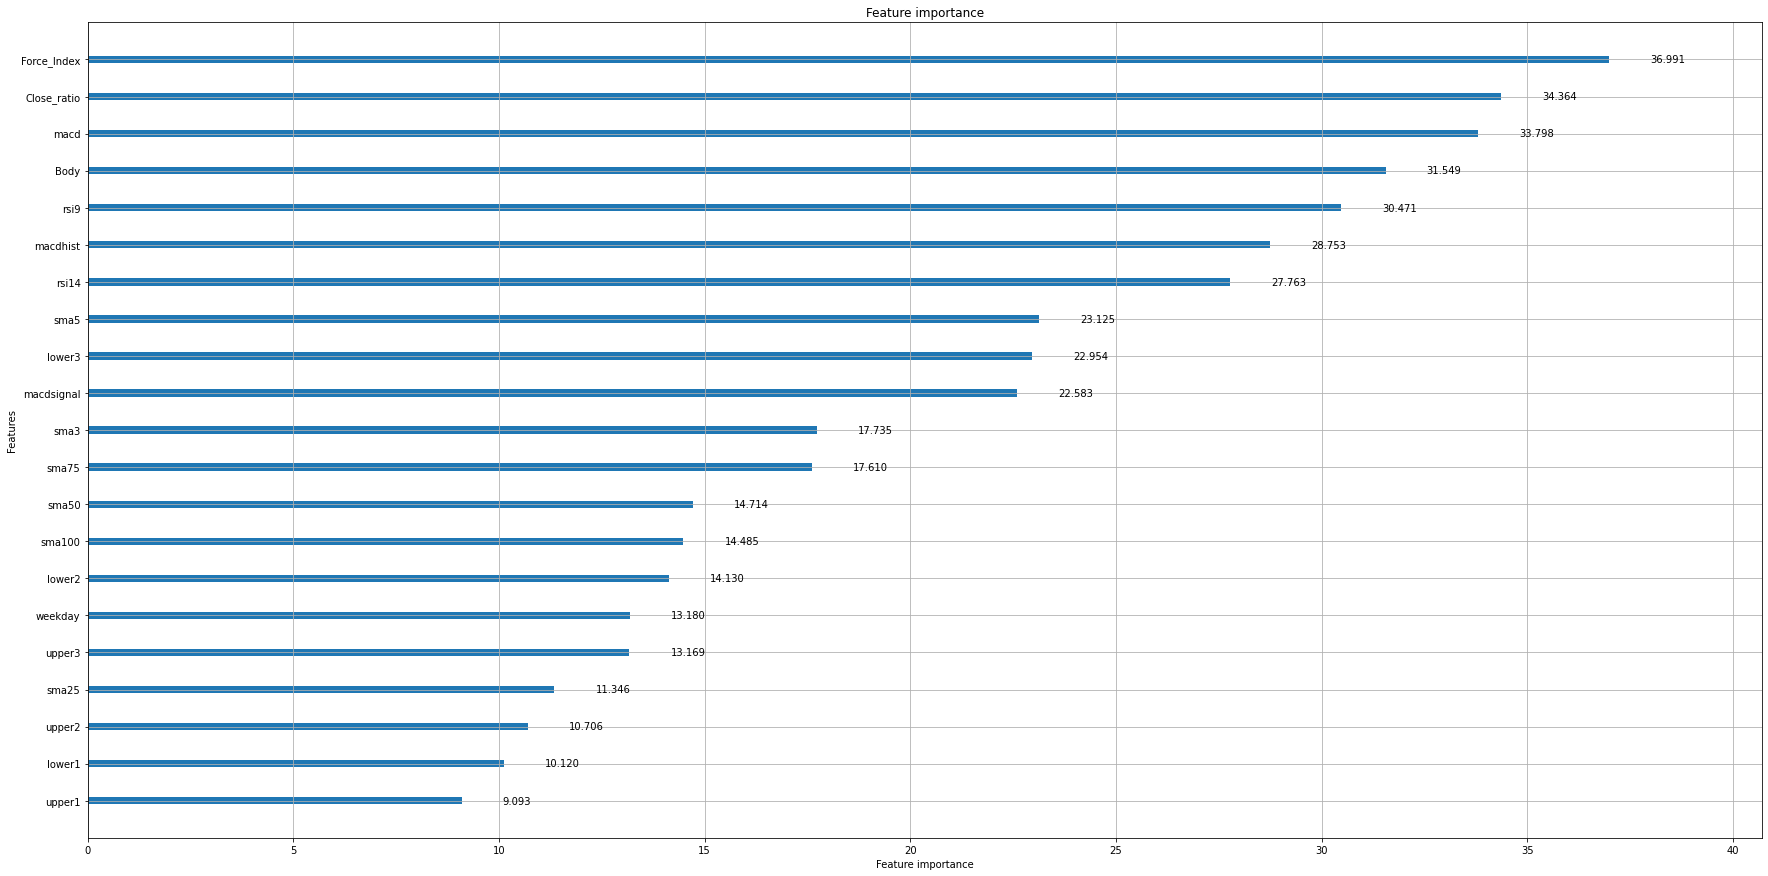

In [27]:
# 重要度としては「特徴量がある分岐（ノード）において目的関数の改善に寄与した度合い」
lgb.plot_importance(clf, figsize=(30, 15), max_num_features=30, importance_type='gain')